In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
%matplotlib widget

In [2]:
z1 = np.arange(1e+6,1e+2,5000)
Yn = np.array([0,1,3,5,7,9,11,13,15])
colors = plt.colormaps['jet'].resampled(9)

In [3]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [4]:
G = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * (2*K**3*T**3)/(vc**2*h_pl**2)
Y = lambda x: G(x) * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 ) 
M = lambda x: G(x)* (0.4561-1.0/x) 


In [5]:
#Analytic estimation of mu distortion taking into connsideration how much energy I have injected
folder1 = 'outputs/fhm-5e5/PDE-non-linear/'
file_path = os.path.join(folder1, f"Greens/Dn_0.delta-z.dat")
op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb= op.iat[0,1]
mu = 1.401e-5 * Jbb #by definition in CUSO notes mu = 1.401 * Drho/rho  * Jbb

In [6]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [7]:
# import standard runmode data

file_path = os.path.join(folder1, "Greens/Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x = HC.iloc[:, 0].values
DI = (HC.iloc[:, 4].values)
DI_N = (HC.iloc[:, 5].values)

In [8]:
#import frequency hierarchy module output

folder2 = 'outputs/fhm-5e5/'

xyn= []
DIyn= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2, f"0.1/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn.append(op.iloc[:, 0].values)
    DIyn.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

xyn2= []
DIyn2= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2, f"Y{Yn[i]}_1/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn2.append(op.iloc[:, 0].values)
    DIyn2.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!
    

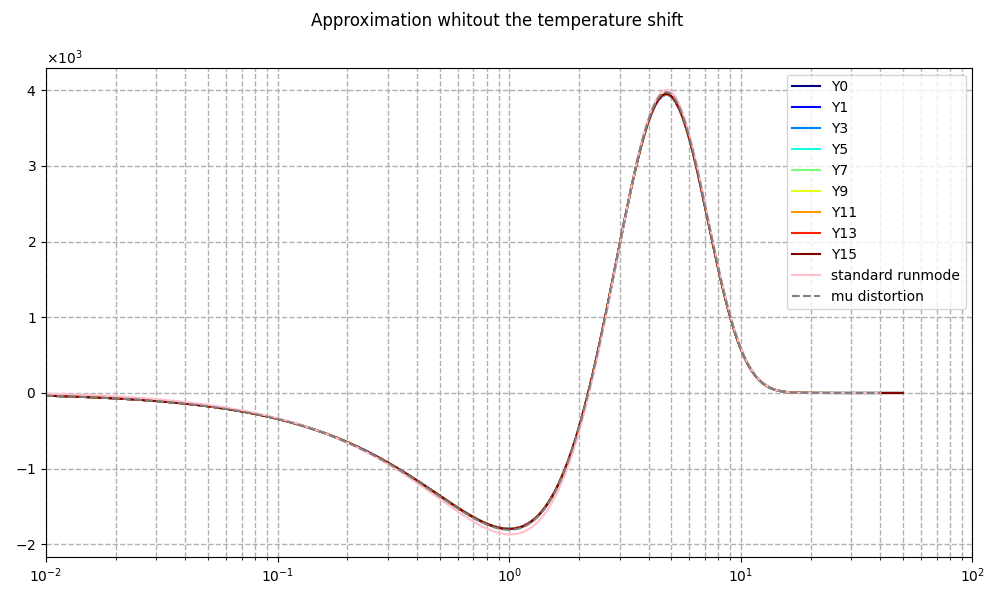

In [9]:


fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Approximation whitout the temperature shift ")

for i in range (len(Yn)):
    ax1.plot(xyn[i],DIyn[i], label = f"Y{Yn[i]}", color = colors(i))

ax1.plot(x,DI_N, label = "standard runmode", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [10]:
folder3 = 'outputs/fhm-5e5G2/'

xynG= []
DIynG= []
for i in range (len(Yn)):
    file_path = os.path.join(folder3, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xynG.append(op.iloc[:, 0].values)
    DIynG.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

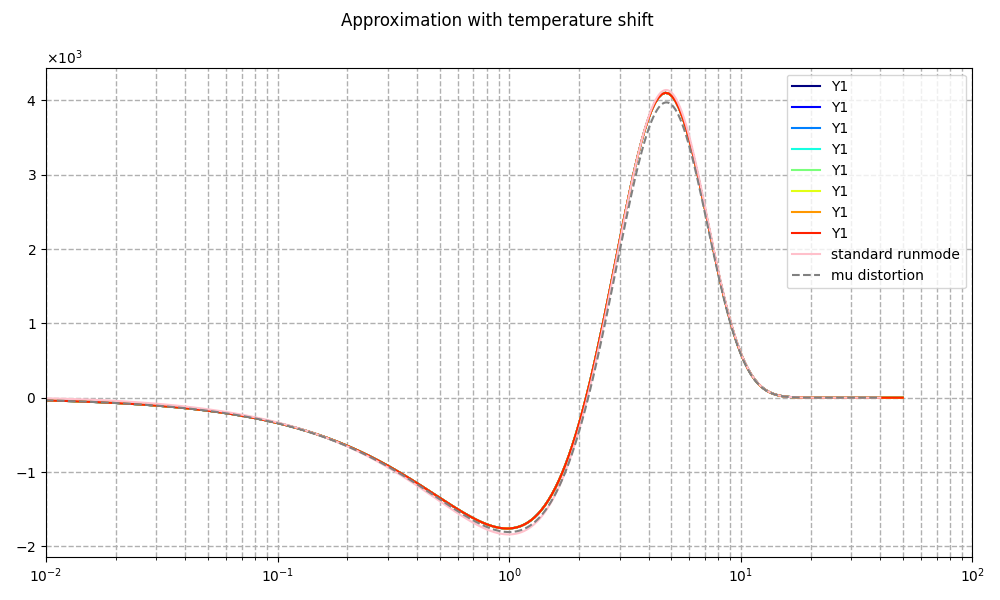

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Approximation with temperature shift ")

for i in range (len(Yn)-1):
    ax1.plot(xynG[1],DIynG[1], label = f"Y{Yn[1]}", color = colors(i))

ax1.plot(x,DI, label = "standard runmode", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*#
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

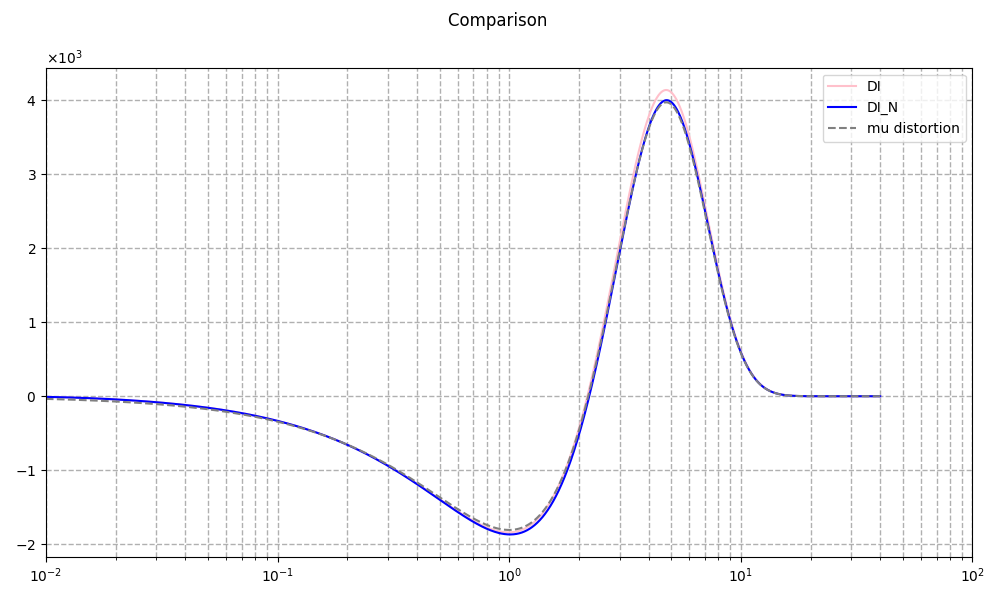

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Comparison ")

#for i in range (len(Yn)):
#    ax1.plot(xynG[i],DIynG[i], label = f"Y{Yn[i]}", color = colors(i))

ax1.plot(x,DI, label = "DI", color= "pink")
ax1.plot(x,DI_N, label = "DI_N", color= "blue")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [13]:
folder3 = 'outputs/fhm-1e5/'

xyn1= []
DIyn1= []
for i in range (len(Yn)):
    file_path = os.path.join(folder3, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn1.append(op.iloc[:, 0].values)
    DIyn1.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

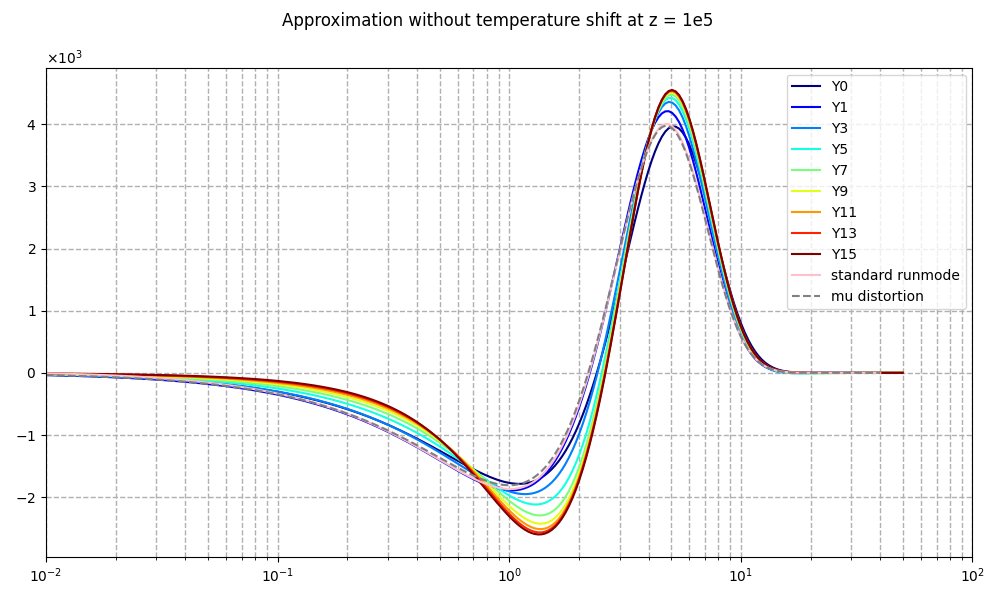

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Approximation without temperature shift at z = 1e5 ")

for i in range (len(Yn)):
    ax1.plot(xyn1[i],DIyn1[i], label = f"Y{Yn[i]}", color = colors(i))

ax1.plot(x,DI_N, label = "standard runmode", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()